## Import and clean

In [ ]:
#Read the Dataset in pandas and obtain number of data and its columns
import pandas as pd
df=pd.read_csv('Survey on Public Perception of Medical Insurance in Malaysia.csv')
print(df.shape)
df.head()

(112, 17)


,Timestamp,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions."
0,2024/05/09 11:31:48 AM GMT+8,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...
1,2024/05/09 11:35:55 AM GMT+8,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...
2,2024/05/09 11:43:17 AM GMT+8,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...
3,2024/05/10 10:31:38 PM GMT+8,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...
4,2024/05/10 10:35:44 PM GMT+8,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...


In [ ]:
df = df.drop('Timestamp', axis=1)

df.head(5)

,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions."
0,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...
1,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...
2,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...
3,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...
4,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...


In [ ]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, punctuations
    text = re.sub(r"[^a-zA-Z#]", " ", text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    text_tokens = text.split()
    text = " ".join([word for word in text_tokens if word not in stop_words])

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['clean_text'] = df["What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?"].apply(lambda x: clean_text(x))
df

,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions.",clean_text
0,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...,think medical insurance important everyone get...
1,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...,yes medical card essential everyone cost medic...
2,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...,wont say medical insurance essential good insu...
3,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...,medical card essential everyone insurance prov...
4,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...,everybody get medical card insurance company t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Female,Indian,26 - 35,Selangor,Information Technology (IT),No,Yes,Medical Card,TikTok,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Additional benefits and services,No,Yes,Very important as the government hospital is o...,The insurance company did not provide any paym...,important government hospital overcrowded affo...
108,Male,Malay,26 - 35,Selangor,Information Technology (IT),No,Yes,Medical Card,TikTok,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Additional benefits and services,No,Yes,The cost of dialysis and cancer treatments is ...,The company offered discounts to change to a n...,cost dialysis cancer treatments crazy high dis...
109,Male,Indian,56 +,Selangor,Engineering,No,No,NaN,Facebook,Emplo

In [ ]:
import re, string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Text Pre-Processing
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace
    return text

# remove stop words
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

# Stemming
port = PorterStemmer()
def stemming(string):
    a=[port.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Lemmatizer
wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df['clean_text'] = df['clean_text'].apply(lambda x: finalpreprocess(x))
df

,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions.",clean_text
0,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...,think medical insurance important everyone get...
1,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...,yes medical card essential everyone cost medic...
2,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...,wont say medical insurance essential good insu...
3,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...,medical card essential everyone insurance prov...
4,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...,everybody get medical card insurance company t...
5,Male,Malay,46 - 55,Selangor,Engineering,No,No,NaN,Facebook,Employer-provided,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,Not sure,No,I think its not really essential to get medica...,tbh i dont like insurance agents as they alway...,think really essential get medical insurance p...
6,Male,Indian,18 - 25,Selangor,Information Technology (IT),No,Maybe,Both,Facebook,Through insurance agents,Price;Coverage;Policy terms and conditions,Affordability;Coverage adequacy,Not sure,Yes,very important to get a medical card. gov hosp...,i have never claimed before but my agent alway...,important get medical card gov hospital crowd ...
7,Female,Malay,36 - 45,Kedah,Finance/Banking,No,Yes,Both,Instagram,Directly from insurance company's website,Price;Customer Reviews;Ease of claim process,Affordability;Additi

## Word Cloud

In [ ]:
from collections import Counter
counts = Counter(" ".join(df['clean_text']).split()).most_common()
counts

[('medical', 116),
 ('insurance', 104),
 ('essential', 27),
 ('important', 21),
 ('get', 20),
 ('high', 18),
 ('cost', 17),
 ('health', 17),
 ('everyone', 14),
 ('costs', 14),
 ('life', 14),
 ('think', 13),
 ('expenses', 13),
 ('coverage', 13),
 ('financial', 13),
 ('premiums', 12),
 ('need', 11),
 ('without', 11),
 ('treatments', 11),
 ('yes', 10),
 ('peace', 10),
 ('mind', 10),
 ('care', 10),
 ('healthcare', 10),
 ('covers', 10),
 ('card', 9),
 ('hospital', 9),
 ('people', 9),
 ('money', 9),
 ('one', 8),
 ('unexpected', 8),
 ('cover', 8),
 ('might', 8),
 ('better', 7),
 ('good', 7),
 ('helps', 7),
 ('always', 6),
 ('bills', 6),
 ('afford', 6),
 ('like', 6),
 ('future', 6),
 ('pay', 6),
 ('even', 6),
 ('healthy', 6),
 ('security', 6),
 ('time', 5),
 ('treatment', 5),
 ('policy', 5),
 ('needs', 5),
 ('accident', 5),
 ('family', 5),
 ('especially', 5),
 ('covered', 5),
 ('use', 5),
 ('emergencies', 5),
 ('critical', 5),
 ('believe', 5),
 ('worth', 5),
 ('something', 5),
 ('investment', 

In [ ]:
# Import package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob
import seaborn as sns

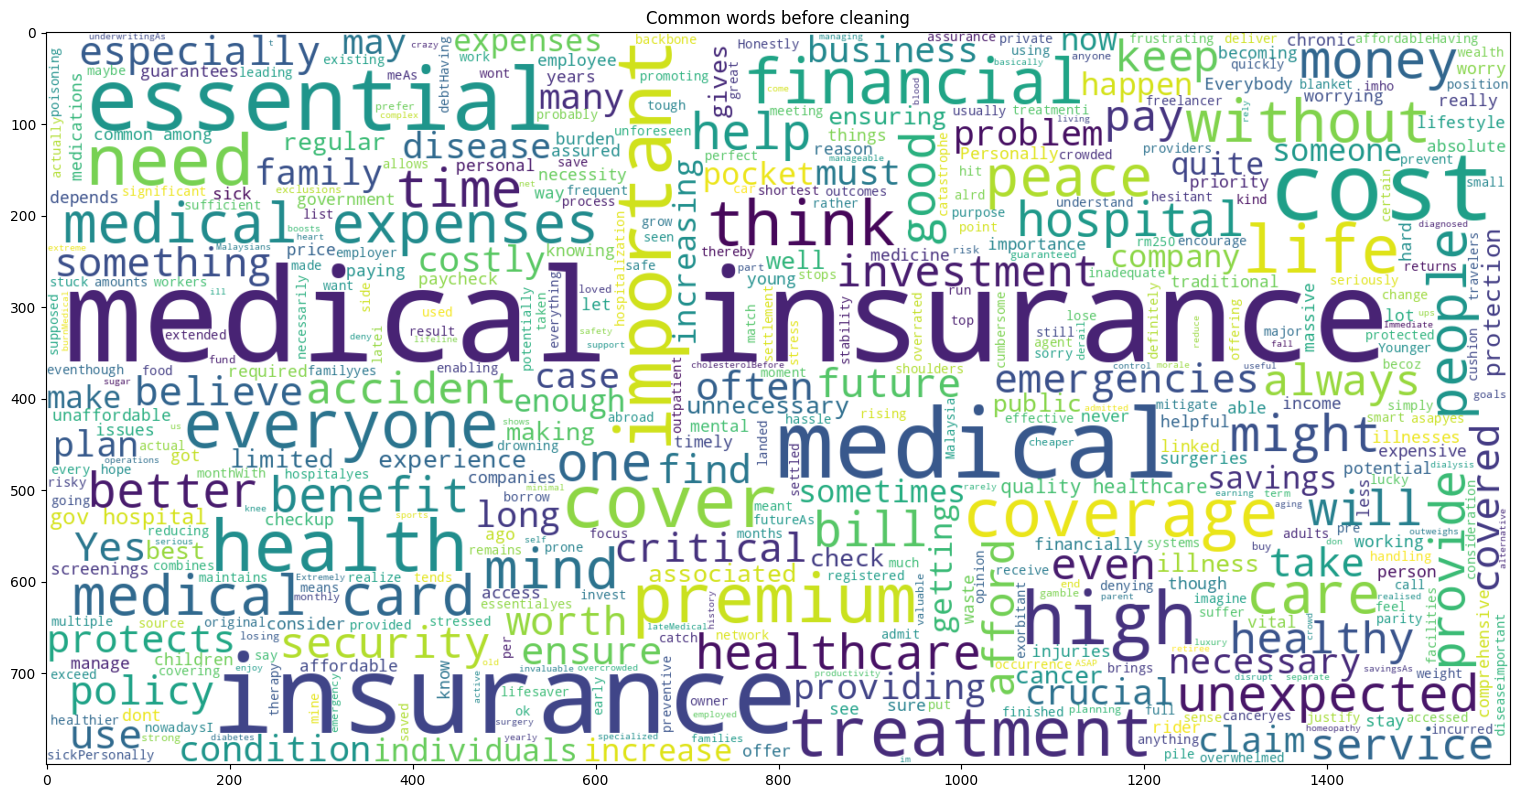

In [ ]:
wc = ''.join([text for text in df["What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?"]])
wordcloud = WordCloud(width = 1600, height = 800, max_words=500, background_color ='white').generate(wc)
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Common words before cleaning")
plt.tight_layout(pad = 0)
plt.show()

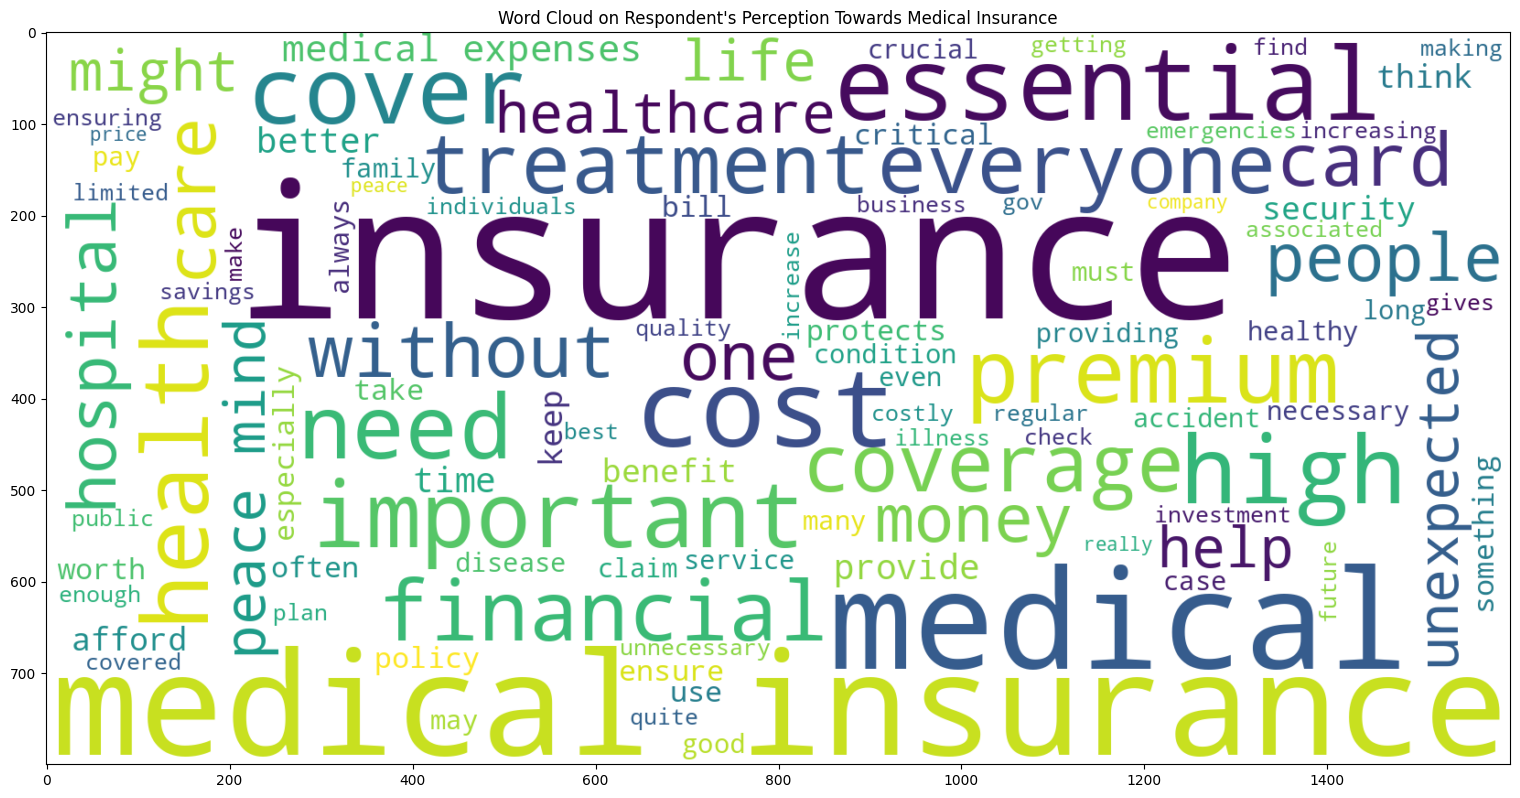

In [ ]:
wc = ''.join([text for text in df['clean_text']])
wordcloud = WordCloud(width = 1600, height = 800, max_words=100, background_color ='white').generate(wc)
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud on Respondent's Perception Towards Medical Insurance")
plt.tight_layout(pad = 0)
plt.show()

## Sentiment Analysis using TextBlob

In [ ]:
from textblob import TextBlob

# To calculate polarity of the text
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

def get_sentiment(value):
  if value < 0:
    return "Negative"
  elif value > 0:
    return "Positive"
  else:
    return "Neutral"

In [ ]:
df['Polarity'] = df['clean_text'].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment)
df[['clean_text', 'Polarity', 'Sentiment']].head(5)

,clean_text,Polarity,Sentiment
0,think medical insurance important everyone get...,0.200000,Positive
1,yes medical card essential everyone cost medic...,0.040000,Positive
2,wont say medical insurance essential good insu...,0.233333,Positive
3,medical card essential everyone insurance prov...,0.000000,Neutral
4,everybody get medical card insurance company t...,-0.357143,Negative


<Axes: ylabel='count'>

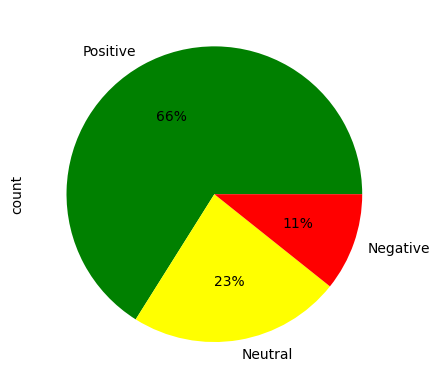

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "yellow", "red"])

In [ ]:
print(df["Sentiment"].value_counts())

Sentiment
Positive    74
Neutral     26
Negative    12
Name: count, dtype: int64


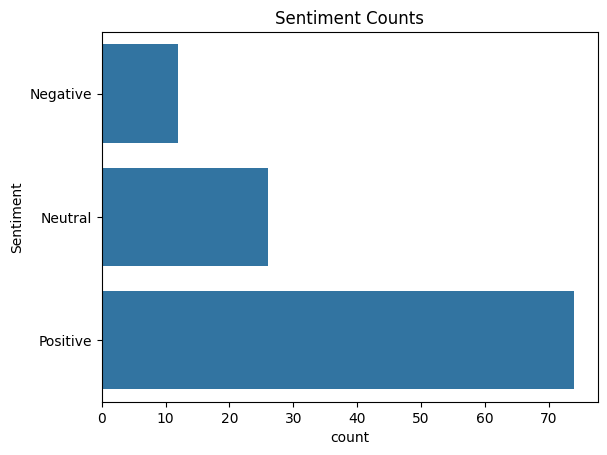

In [ ]:
# Change the datatype as "category"
df["Sentiment"] = df["Sentiment"].astype("category")

# Visualize the Sentiment counts
sns.countplot(df["Sentiment"])
plt.title("Sentiment Counts")
plt.show()


## Sentiment Classification using BERT

In [ ]:
#keras
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel

In [ ]:
df['Sentiment'].value_counts()

Sentiment
Positive    74
Neutral     26
Negative    12
Name: count, dtype: int64

In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['clean_text']).reshape(-1, 1), np.array(df['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['clean_text', 'Sentiment']);

In [ ]:
train_os['Sentiment'].value_counts()

Sentiment
Positive    74
Neutral     74
Negative    74
Name: count, dtype: int64

In [ ]:
X = train_os['clean_text'].values
y = train_os['Sentiment'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
df_test = df
X_test = df_test['clean_text'].values
y_test = df_test['Sentiment'].values

In [ ]:
from sklearn import preprocessing

y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 155
VALIDATION DATA: 67
TESTING DATA: 112


Naive Bayes

In [ ]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)
nb_pred = nb_clf.predict(X_test_tf)
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.48      0.92      0.63        12
     Neutral       0.75      0.92      0.83        26
    Positive       1.00      0.77      0.87        74

    accuracy                           0.82       112
   macro avg       0.74      0.87      0.78       112
weighted avg       0.89      0.82      0.83       112



In [ ]:
from transformers import DistilBertTokenizer

MAX_LEN = 128
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

MAX_LEN=128
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
5/5 [==============================] - 375s 61s/step - loss: 1.1177 - categorical_accuracy: 0.3806 - val_loss: 1.0741 - val_categorical_accuracy: 0.4328
Epoch 2/4
5/5 [==============================] - 285s 59s/step - loss: 1.0203 - categorical_accuracy: 0.5032 - val_loss: 0.9972 - val_categorical_accuracy: 0.4925
Epoch 3/4
5/5 [==============================] - 281s 58s/step - loss: 0.8956 - categorical_accuracy: 0.8065 - val_loss: 0.9132 - val_categorical_accuracy: 0.7164
Epoch 4/4
5/5 [==============================] - 276s 56s/step - loss: 0.7812 - categorical_accuracy: 0.7548 - val_loss: 0.8597 - val_categorical_accuracy: 0.5821


In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

4/4 [==============================] - 63s 12s/step


In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.54      0.58      0.56        12
     Neutral       0.81      0.65      0.72        26
    Positive       0.87      0.92      0.89        74

   micro avg       0.82      0.82      0.82       112
   macro avg       0.74      0.72      0.73       112
weighted avg       0.82      0.82      0.82       112
 samples avg       0.82      0.82      0.82       112



In [ ]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17)
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

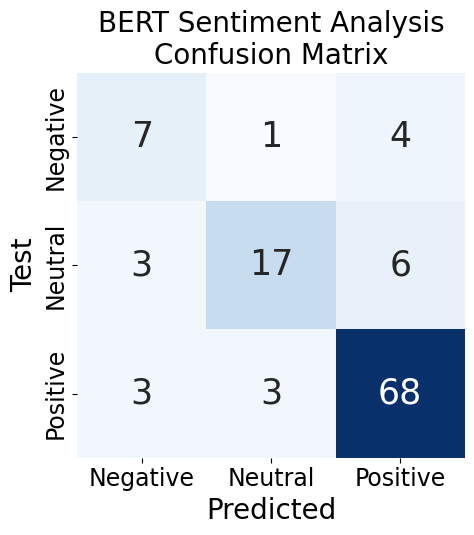

In [ ]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')